In [1]:
#using Distributed
#@everywhere using MambaModels
using MambaModels

Data

In [2]:
globe_toss = Dict{Symbol, Any}(
  :w => [6, 7, 5, 6, 6],
  :n => [9, 9, 9, 9, 9]
)
globe_toss[:N] = length(globe_toss[:w]);

Model Specification

In [3]:
model = Model(
  w = Stochastic(1,
    (n, p, N) ->
      UnivariateDistribution[Binomial(n[i], p) for i in 1:N],
    false
  ),
  p = Stochastic(() -> Beta(1, 1))
);

Initial Values

In [4]:
inits = [
  Dict(:w => globe_toss[:w], :n => globe_toss[:n], :p => 0.5),
  Dict(:w => globe_toss[:w], :n => globe_toss[:n], :p => rand(Beta(1, 1)))
];

Sampling Scheme

In [5]:
scheme = [NUTS(:p)]
setsamplers!(model, scheme);

MCMC Simulations

In [6]:
chn = mcmc(model, globe_toss, inits, 10000, burnin=2500, thin=1, chains=2);

MCMC Simulation of 10000 Iterations x 2 Chains...

Chain 1:   0% [0:00:04 of 0:00:04 remaining]
Chain 1:  10% [0:00:01 of 0:00:01 remaining]
Chain 1:  20% [0:00:01 of 0:00:01 remaining]
Chain 1:  30% [0:00:01 of 0:00:01 remaining]
Chain 1:  40% [0:00:01 of 0:00:01 remaining]
Chain 1:  50% [0:00:01 of 0:00:01 remaining]
Chain 1:  60% [0:00:00 of 0:00:01 remaining]
Chain 1:  70% [0:00:00 of 0:00:01 remaining]
Chain 1:  80% [0:00:00 of 0:00:01 remaining]
Chain 1:  90% [0:00:00 of 0:00:01 remaining]
Chain 1: 100% [0:00:00 of 0:00:01 remaining]

Chain 2:   0% [0:00:01 of 0:00:01 remaining]
Chain 2:  10% [0:00:01 of 0:00:01 remaining]
Chain 2:  20% [0:00:01 of 0:00:01 remaining]
Chain 2:  30% [0:00:01 of 0:00:01 remaining]
Chain 2:  40% [0:00:01 of 0:00:01 remaining]
Chain 2:  50% [0:00:00 of 0:00:01 remaining]
Chain 2:  60% [0:00:00 of 0:00:01 remaining]
Chain 2:  70% [0:00:00 of 0:00:01 remaining]
Chain 2:  80% [0:00:00 of 0:00:01 remaining]
Chain 2:  90% [0:00:00 of 0:00:01 remaining]
Cha

Describe draws

In [7]:
describe(chn)

Iterations = 2501:10000
Thinning interval = 1
Chains = 1,2
Samples per chain = 7500

Empirical Posterior Estimates:
     Mean       SD       Naive SE       MCSE      ESS
p 0.6592997 0.06845983 0.0005589722 0.0007125408 7500

Quantiles:
     2.5%      25.0%     50.0%     75.0%      97.5%  
p 0.52121808 0.6129694 0.663594 0.70716006 0.78435990



Convert to MCMCChains.Chains object

In [8]:
chn2 = MCMCChains.Chains(chn.value, String.(chn.names))

Object of type Chains, with data of type 7500×1×2 Array{Float64,3}

Iterations        = 1:7500
Thinning interval = 1
Chains            = 1, 2
Samples per chain = 7500
parameters        = p

Summary Statistics

│ Row │ parameters │ mean    │ std       │ naive_se    │ mcse        │ ess     │
│     │ Symbol     │ Float64 │ Float64   │ Float64     │ Float64     │ Float64 │
├─────┼────────────┼─────────┼───────────┼─────────────┼─────────────┼─────────┤
│ 1   │ p          │ 0.6593  │ 0.0684598 │ 0.000558972 │ 0.000712541 │ 9231.07 │

Describe the MCMCChains

In [9]:
MCMCChains.describe(chn2)

2-element Array{MCMCChains.ChainDataFrame,1}

Summary Statistics

│ Row │ parameters │ mean    │ std       │ naive_se    │ mcse        │ ess     │
│     │ Symbol     │ Float64 │ Float64   │ Float64     │ Float64     │ Float64 │
├─────┼────────────┼─────────┼───────────┼─────────────┼─────────────┼─────────┤
│ 1   │ p          │ 0.6593  │ 0.0684598 │ 0.000558972 │ 0.000712541 │ 9231.07 │

Quantiles

│ Row │ parameters │ 2.5%     │ 25.0%    │ 50.0%    │ 75.0%   │ 97.5%   │
│     │ Symbol     │ Float64  │ Float64  │ Float64  │ Float64 │ Float64 │
├─────┼────────────┼──────────┼──────────┼──────────┼─────────┼─────────┤
│ 1   │ p          │ 0.521218 │ 0.612969 │ 0.663594 │ 0.70716 │ 0.78436 │


Plot chn2

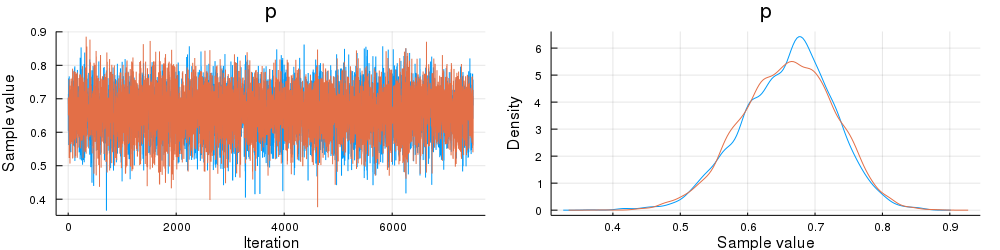

In [10]:
MCMCChains.plot(chn2)

End of `02/m2.1m.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*